## CNN for Fashion MNIST

In [17]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

In [18]:
learning_rate = 1e-3
batch_size = 100
epochs = 15

### 1. Data

In [19]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [20]:
print('train_data :', train_data)
print('test_data :', test_data)

train_data : Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
test_data : Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


### 2. Model(output=10)

In [21]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True) # output=10
        #nn.init.xavier_uniform_(self.fc.weight) # weight를 초기화 하는 방법(넣고 돌려도됨)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten 
        out = self.fc(out) # softmax는 CEloss에 포함되어있음
        return out

model = CNN()

### 3. Loss and Optimizer(loss function=CE, optimizer=Adam)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 4. Train/Test the model

In [23]:
def train_loop(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = criterion(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= num_batches
    correct /= size
    print(f"Train - Avg loss: {train_loss:>8f},  Accuracy: {(100*correct):>0.1f}%", end = "  ")

    return train_loss, correct


def test_loop(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test - Avg loss: {test_loss:>8f}  Accuracy: {(100*correct):>0.1f}%")

    return test_loss, correct

In [24]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1} :", end= "  ")
    loss, acc = train_loop(train_dataloader, model, criterion, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)

    loss_t, acc_t = test_loop(test_dataloader, model, criterion)
    test_loss.append(loss_t)
    test_acc.append(acc_t)

print("Done")

Epoch 1 :  Train - Avg loss: 0.489662,  Accuracy: 82.5%  Test - Avg loss: 0.382998  Accuracy: 86.3%
Epoch 2 :  Train - Avg loss: 0.320579,  Accuracy: 88.5%  Test - Avg loss: 0.342233  Accuracy: 87.6%
Epoch 3 :  Train - Avg loss: 0.281927,  Accuracy: 89.9%  Test - Avg loss: 0.313358  Accuracy: 88.7%
Epoch 4 :  Train - Avg loss: 0.257758,  Accuracy: 90.7%  Test - Avg loss: 0.301246  Accuracy: 89.3%
Epoch 5 :  Train - Avg loss: 0.239086,  Accuracy: 91.4%  Test - Avg loss: 0.291943  Accuracy: 89.6%
Epoch 6 :  Train - Avg loss: 0.223458,  Accuracy: 92.0%  Test - Avg loss: 0.285088  Accuracy: 90.0%
Epoch 7 :  Train - Avg loss: 0.209730,  Accuracy: 92.5%  Test - Avg loss: 0.281977  Accuracy: 90.2%
Epoch 8 :  Train - Avg loss: 0.197507,  Accuracy: 92.9%  Test - Avg loss: 0.281412  Accuracy: 90.4%
Epoch 9 :  Train - Avg loss: 0.186115,  Accuracy: 93.4%  Test - Avg loss: 0.279516  Accuracy: 90.5%
Epoch 10 :  Train - Avg loss: 0.175775,  Accuracy: 93.8%  Test - Avg loss: 0.281052  Accuracy: 90.8%

### 4-1. Test Accuracy

In [25]:
print("test accuracy: {}".format(test_acc[-1]))

test accuracy: 0.9082


### 5. Result plot

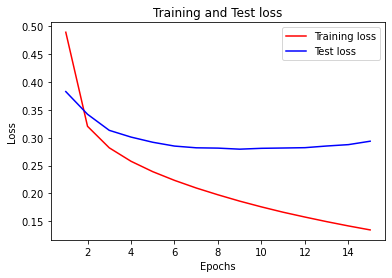

In [26]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() # 현재 epoch 끝에서 test loss가 증가하려함

### Plot the Training/Test Accuracy

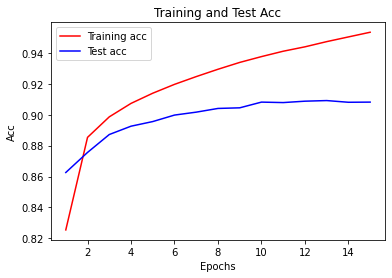

In [27]:
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## 2.아래의 글을 읽고 500자 이내로 감상문을 작성하세요.

https://webzine.kps.or.kr/?p=5_view&idx=16537

베이커 그룹은 툴을 더 발전시키는 방법으로 단백질 구조에서 두 배열의 거리 뿐만 아니라 각도를 고려하였지만, 알파폴드2는 기존의 CNN방식을 과감히 버리고, transformer 방식을 채택하였다.
CNN의 단점은 필터의 weight값들은 학습이 끝나면 고정된 값을 사용하기 때문에 input에 변화가 생겨도 weight의 변화가 없다. 이 단점들을 transformer을 사용하면 바로 해결된다. transformer에선 미분 가능한 local relation layer을 도입하여 해결하고, 더 효율적인 학습이 가능하다. 이를 채택한 것이 50여 년 학계의 노하우보다 훨씬 뛰어났다.
최근엔 수십년 그 자리를 지켜온 기술들도 한순간에 도태되는 경우가 많다. 그리고, 그 중심엔 AI가 있다. 많은 주요 산업에서 AI가 엄청난 활약을 하고있다. 따라서 AI의 발전 흐름을 읽고 미리 준비하는 자세가 자신의 경쟁력 또는 학문의 발전을 이루는 길이 될 것이라고 생각한다.
